### Name - Anirudh Tyagi
### School - School Of Computing and Data Science
### E-mail - anirudh.t-26@scds.saiuniversity.edu.in

- #### Total number of images: 959
- #### Number of images per class:
    - Damask Rose images: 200
    - Rain Lily images: 199
    - Echeveria Flower images: 200
    - Mirabilis Jalapa images: 200
    - Zinnia Elegans images: 160
- #### Total number of images used for training and testing:
    - Training : 719
    - Testing : 240

In [6]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
tf.random.set_seed(42)
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import PIL
from PIL import Image

2.16.2


In [7]:
from numpy import load
X_train_std = load('/Users/anirudhtyagi/Projects/DL_PROJECT/X_train_std.npy')
X_test_std = load('/Users/anirudhtyagi/Projects/DL_PROJECT/X_test_std.npy')
y_train = load('/Users/anirudhtyagi/Projects/DL_PROJECT/y_train.npy')
y_test = load('/Users/anirudhtyagi/Projects/DL_PROJECT/y_test.npy')

In [8]:
base_model = keras.applications.InceptionResNetV2(
                include_top=False,
                weights="imagenet"
)

# Freeze the weights - will not be updated during backpropagation
for layer in base_model.layers:
  layer.trainable = False

# Adding classifier
global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)

x = keras.layers.BatchNormalization()(global_pool)
x = keras.layers.Dropout(0.25)(x)

output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])

In [9]:
from sklearn.preprocessing import LabelEncoder
model_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks1_TL = [
             keras.callbacks.ModelCheckpoint("bestTL1.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
history1_TL = model_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks1_TL)

Epoch 1/10


/Users/anirudhtyagi/Projects/DL_PROJECT/dl_project/lib/python3.9/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_784']
Received: inputs=Tensor(shape=(None, 299, 299, 3))
  warnings.warn(msg)


41/41 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6030 - loss: 1.1168 - val_accuracy: 0.9861 - val_loss: 0.4231
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9857 - loss: 0.0461 - val_accuracy: 0.9861 - val_loss: 0.2154
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9971 - loss: 0.0220 - val_accuracy: 1.0000 - val_loss: 0.1116
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9994 - loss: 0.0121 - val_accuracy: 1.0000 - val_loss: 0.0511
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9998 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0232
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0031
Ep

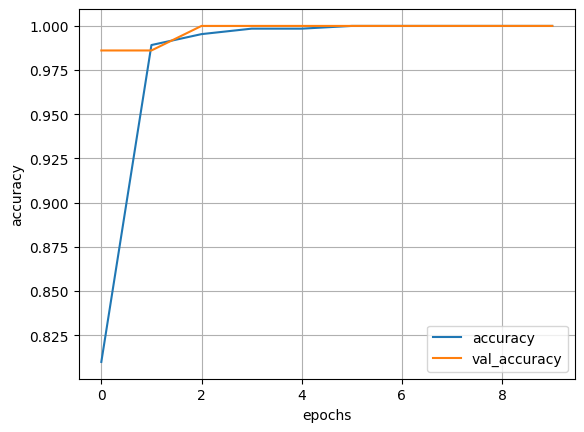

In [12]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history1_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [13]:
model_TL.load_weights("bestTL1.weights.h5")

In [14]:
model_TL.save("/Users/anirudhtyagi/Projects/DL_PROJECT/Model1_TL.keras")